## 1. Brief Introduction

### Jupyter - this 'notebook' 

During the course you can use the Jupyter Notebooks either via Noteable system or in your local (up to you). 
They are simply a web-based interface for Python which can also have text and visualisations in between blocks of code. The code is live - you can run it, edit it, get the output etc.

### Useful Operations 

You can find these in the menus above - these are the main things you might need:

- **Run** - To run code or text in a cell. You can also press `Shift+Enter` on your keyboard.
- **Save** - To save the notebook click on the small disk icon. Always do that before leaving your notebook.
- **Clearing all output** - `Kernel/Restart & Clear output`
- **Deleting a block** - `Edit/Delete Cell`
- **Saving a notebook locally to your own computer** - `File/Download As/Notebook(.ipynb)`
- **Closing** - not recommended to close a notebook by closing the window. You should close it from the toolbar `File/Close and Halt`.
- **Stop**: OR "interrupt the kernel" to stop the notebook from doing calculations if it is taking too long because of a coding mistake.

Explore the other buttons at the top panel as well (File - Edit - ... - Help) whenever you have time.

### Importing modules

To bring in the extra functionality of Pythons modules we need to use `import` statements to bring in the tools from those modules and be able to use them. 

**What is module ?**

A Python module is a file containing Python code, which can include functions, classes, and variables, that can be imported and used in other Python scripts, essentially acting as a collection of reusable code to organize and structure larger programs; essentially, it's a way to group related functionalities into a single file with a ".py" extension. 

**How that works ?**

Whenever you import a module once it remains loaded in the background until you reset the Jupyter kernel. 
For instance, to import the module NumPy we have to type in:

In [2]:
# Option 1
# import numpy
# Option 2 as a useful one
import numpy as np

### Main Modules (Libraries) to use

[NumPy](https://numpy.org/doc/stable/) - to perform a wide variety of mathematical operations on numerical data documentation

[**Pandas**](https://pandas.pydata.org/docs/) - for data structures and data analysis tools documentation

[matplotlib](https://matplotlib.org/) - for data visualisation and plotting 

[**seaborn**](https://seaborn.pydata.org/) - it provides a high-level interface for drawing attractive and informative statistical graphics gallery, based on matplotlib behind the scenes


## 2. A Recall for Pandas library

[pandas](http://pandas.pydata.org) is a module which allows the construction of a *dataframe*, this is an object to store data that looks a little like a spreadsheet (the data is indexed principally by a column name and row name/number). It also includes functions designed to make working with this structured or tabular data fast and easy.  

- The website for Pandas is good and contains the main set of documentation. [Here](http://pandas.pydata.org/index.html) is the main website. 
- The main documentation for Pandas is [here](http://pandas.pydata.org/pandas-docs/stable/).
- There is a quick introduction to Pandas [here](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- There is a fantastic tutorial (also in Jupyter) [here](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) (under Lessons for New Pandas Users). This is well worth working through a little if you want a longer introduction to the basic concepts in Pandas.

Please feel free to check the `Introduction2Pandas.ipynb` file and related documentations of the functions whenever you need. 

In [3]:
# Common pandas import statement
import pandas as pd
# Importing seaborn and matplotlib.pyplot for data viz
import seaborn as sns
# matplotlib's pyplot module, which seaborn builds upon for plotting.
import matplotlib.pyplot as plt

## Tips Data to explore

Let us focus on a ready to use data set for the rest of the code for the user friendly examples including data viz  showcases 
 
- Data comes from the seaborn package for data viz examples so it is possible to use previously published data sets from python modules (libraries)

- The details of the data can be checked for further illustrations similar to the above examples 

In [4]:
# Import seaborn
import seaborn as sns

# Load an example dataset
tips = sns.load_dataset("tips")
print(tips.head(10))

print(tips.isnull().any())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool


In [5]:
## Finding the frequency of size to illustrate
tips[["size"]].value_counts(dropna=False)

size
2       156
3        38
4        37
5         5
1         4
6         4
dtype: int64

The tips dataset has 7 columns (features) and 244 rows (observations,samples).

Numerical columns are:

- **total_bill** (continuous) - the amount of the total bill
- **tip** (continuous) - the amount of the tip paid on the bill
- **size** (discrete) - the number of total people served

Categorical columns are:

- **sex** (Male/Female) - the gender of the person who paid the bill
- **smoker** (Yes/No) - whether or not the person who paid the bill is a smoker
- **day** (Thur/Fri/Sat/Sun) - the day when the person paid the bill
- **time** (Lunch/Dinner) - the time of the day i.e. lunch or dinner

**Remove Duplicates**

Duplicate data can be a serious issue, luckily pandas offers a simple way to remove duplicates

In [6]:
# Simple toy illustration
repeat_df = pd.DataFrame(['a','b','c','d','c','b','a'])
print(repeat_df)
print('-----')

print(repeat_df.drop_duplicates())

   0
0  a
1  b
2  c
3  d
4  c
5  b
6  a
-----
   0
0  a
1  b
2  c
3  d


In [7]:
# Original shape of tips data
print(tips.shape)
# Shape of the data after dropping the duplicate
print(tips.drop_duplicates().shape)

(244, 7)
(243, 7)


### **Essential pandas Functions for Data Visualization**

- Data aggregation and grouping techniques using groupby.
- Handle missing data appropriately with suitable functions like `fillna` and `dropna`.
- Indexing the data to reach out necessary components

#### 1. Grouping Data with groupby

Enables efficient computation of summary statistics for subsets of data. Facilitates complex analyses by splitting data into meaningful groups.

Cons:
- Can lead to performance issues with very large datasets if not used judiciously.
- The resulting grouped object requires further operations to extract meaningful information.

In [8]:
# Grouping data by a categorical variable and calculating the mean
grouped_data = tips.groupby('sex').mean()
print(grouped_data)

# Resetting index to flatten the DataFrame
grouped_data = grouped_data.reset_index()
# Displaying the grouped data
print(grouped_data)

        total_bill       tip      size
sex                                   
Male     20.744076  3.089618  2.630573
Female   18.056897  2.833448  2.459770
      sex  total_bill       tip      size
0    Male   20.744076  3.089618  2.630573
1  Female   18.056897  2.833448  2.459770


/tmp/ipykernel_134/3086441283.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = tips.groupby('sex').mean()


#### 2. Handling Missing Data with fillna and dropna

Missing data occurs commonly in many data analysis applications. In pandas, missing numeric data is represented by `NaN` (Not a Number) and can easily be handled by certain functions; 

- `dropna` provides a straightforward method to remove missing data, which can simplify analysis.
- `fillna` allows for imputation of missing values, maintaining the DataFrame's structure.


Cons:

- Imputation may introduce bias if not done carefully.
- Dropping missing data can lead to loss of valuable information, especially in small datasets.

In [9]:
tips_copy = tips.copy()

# Checking for missing values using isnull()
missing_values = tips_copy.isnull()
print(missing_values.sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [10]:
# Displaying the original DataFrame shape
print("Original DataFrame shape:", tips_copy.shape)

# Creating a new row with missing values
tips_row = pd.Series({'total_bill': 50.0, 'tip': None, 'sex': 'Male', 'smoker': 'No', 'day': 'Sun', 'time': 'Dinner', 'size': 3})

# Appending the new row to the DataFrame
tips_new = pd.concat([tips_copy, tips_row.to_frame().T], ignore_index=True)

# Displaying the DataFrame shape after appending
print("DataFrame shape after appending:", tips_new.shape)
print(tips_new.isnull().sum())

Original DataFrame shape: (244, 7)
DataFrame shape after appending: (245, 7)
total_bill    0
tip           1
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [11]:
# Dropping rows with any missing values

# Using with additional 'how' argument below: 
# 'any' : If any NA values are present, drop that row or column.
# 'all' : If all values are NA, drop that row or column.
tips_new_cleaned = tips_new.dropna(how='any')

# Displaying the DataFrame shape after dropping missing values
print("DataFrame shape after dropping missing values:", tips_new_cleaned.shape)
print(tips_new_cleaned.isnull().sum())

DataFrame shape after dropping missing values: (244, 7)
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


Here are some other methods for working with `NaN` which you can find useful:
    
| Method | Description |
| -- | -- |
| dropna | Filter axis labels based on whether the values of each label have missing data|
| fillna | Fill in missing data with some value |
| isnull | Return boolean values indicating which values are missing |
| notnull | Negation of isnull |

**Caution: Filling the missing values might be a challenging task for you during the group project, if you face with. The necessary tools are mainly the beyond the scope of that course so it is better to stick to the complete data (remaining data after removing the missing values)**

## **Indexing Techniques with the tips Dataset**

- Differentiate between label-based (Utilize `.loc`) and position-based (Utilize `.iloc`) indexing.
- Apply boolean indexing to filter data based on conditions.

### 1. Label-Based Indexing with `.loc`

Pros:

- Intuitive when working with labeled data.
- Allows for mixed selection of rows and columns.

Cons:

- Requires knowledge of exact labels.
- May raise KeyError if labels are not found.

In [12]:
# Loading the 'tips' dataset
df = sns.load_dataset('tips')
print(df)

# Setting 'day' as the index
df.set_index('day', inplace=True)
print(df)

# Selecting all rows for 'Sun' and specific columns
sunday_tips = df.loc['Sun', ['total_bill', 'tip', 'time']]

# Displaying the result
print(sunday_tips.head())

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
      total_bill   tip     sex smoker    time  size
day                                                
Sun        16.99  1.01  Female     No  Dinner     2
Sun        10.34  1.66    Male     No  Dinner     3
Sun        21.01  3.50    Male     No  Dinner     3
Sun        23.68  3.31    Male  

- `inplace=True`: This parameter specifies that the operation should modify the existing DataFrame directly, rather than creating and returning a new DataFrame with the changes.

- **Important Note:** When using `inplace=True`, the set_index method does not return a new DataFrame; instead, it returns None and modifies the original DataFrame. Therefore, you should avoid assigning the result to a variable, as this would set that variable to None

**Exercise:**

Task: Set the 'time' column as the index and select all rows for 'Dinner' with columns 'total_bill' and 'size'.

Solution:

In [13]:
# Setting 'time' as the index
df.set_index('time', inplace=True)

# Selecting all rows for 'Dinner' and specific columns
dinner_tips = df.loc['Dinner', ['total_bill', 'size']]

# Displaying the result
print(dinner_tips.head())

        total_bill  size
time                    
Dinner       16.99     2
Dinner       10.34     3
Dinner       21.01     3
Dinner       23.68     2
Dinner       24.59     4


### 2. Position-Based Indexing with `.iloc`

Pros:

- Useful for selecting data by position when labels are unknown.
- Supports slicing and indexing similar to NumPy arrays.

Cons:

- Less intuitive with labeled data.
- Can lead to errors if positions are miscalculated.

In [14]:
# Resetting the index to default integer index
df.reset_index(inplace=True)
print(df.head())

# Selecting the first 5 rows and columns at positions 0, 1, and 3
subset = df.iloc[:5, [0, 1, 3]]

# Displaying the result
print(subset)

     time  total_bill   tip     sex smoker  size
0  Dinner       16.99  1.01  Female     No     2
1  Dinner       10.34  1.66    Male     No     3
2  Dinner       21.01  3.50    Male     No     3
3  Dinner       23.68  3.31    Male     No     2
4  Dinner       24.59  3.61  Female     No     4
     time  total_bill     sex
0  Dinner       16.99  Female
1  Dinner       10.34    Male
2  Dinner       21.01    Male
3  Dinner       23.68    Male
4  Dinner       24.59  Female


**Exercise:**

Task: Select the last 3 rows and the first two columns using .iloc.

Solution:

In [15]:
# Selecting the last 3 rows and the first two columns
subset = df.iloc[-3:, :2]

# Displaying the result
print(subset)

       time  total_bill
241  Dinner       22.67
242  Dinner       17.82
243  Dinner       18.78


### 3. Boolean Indexing

Pros:

- Allows for filtering data based on conditions.
- Enables complex queries on DataFrame.

Cons:

- Can result in empty DataFrames if no rows meet the condition.
- May lead to performance issues with very large datasets.

In [16]:
# Filtering rows where 'total_bill' is greater than $20
high_bill_tips = df[df['total_bill'] > 20]

# Displaying the result
print(high_bill_tips.head())

     time  total_bill   tip     sex smoker  size
2  Dinner       21.01  3.50    Male     No     3
3  Dinner       23.68  3.31    Male     No     2
4  Dinner       24.59  3.61  Female     No     4
5  Dinner       25.29  4.71    Male     No     4
7  Dinner       26.88  3.12    Male     No     4


**Exercise:**

Task: Filter the DataFrame to include only rows where 'tip' is less than $5 and the 'smoker' status is 'Yes'.

Solution:

In [17]:
# Filtering rows based on multiple conditions
low_tip_smokers = df[(df['tip'] < 5) & (df['smoker'] == 'Yes')]

# Displaying the result
print(low_tip_smokers.head())

      time  total_bill   tip   sex smoker  size
56  Dinner       38.01  3.00  Male    Yes     4
58  Dinner       11.24  1.76  Male    Yes     2
60  Dinner       20.29  3.21  Male    Yes     2
61  Dinner       13.81  2.00  Male    Yes     2
62  Dinner       11.02  1.98  Male    Yes     2


## Visualization with Seaborn

Data visualization is displaying quantitative and qualitative information so that a viewer can see patterns, trends, oddities, correlations, constancy, and variation, in ways that other forms (text and table) may not allow. Plotting parts of data can be an important step in descriptive and exploratory analyses. 

**Why python ?**

- Try to make sure what you need while exploring your data for the group project 

- If the Tableau option good for you, feel free to go that direction but seaborn or altair are still good alternatives for you 

Whenever you feel struggling, please let us know via our meetings, drop-in sessions or Teams channel. 
You can work with your group members as well while working on these python scripts in general; 

`"Learning is the new skill. Imagination, creation and asking new questions are at its core" (proverb)`.

### matplotlib library

Matplotlib is a visualization library/module in Python for 2D plots. It allows us visual access to huge amounts of data in easily digestible visuals. Matplotlib can produce several plots like line, bar, scatter, histogram etc.

- The default plot in matplotlib is a line plot made by the function plot.

- Some other types of plots in matplolib are `plt.scatter`, `plt.bar`, `plt.hist`, `plt.pie` that fit different types of data.

- It is not difficult to make more complicated plots with matplotlib. However, seaborn serves for more engaging and better structured outputs while creating the data visualizations.

Check out some [examples given by Matplotlib](https://matplotlib.org/stable/gallery/index) if you are interested in, but we are looking at the Seaborn module for today in general. 

## Seaborn library

Seaborn is a library/module/package for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn has a nice structure which makes plotting easier using three types of relplot, displot, and catplot (“relational”, “distributional”, and “categorical” plots).

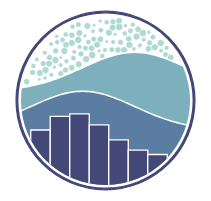

- Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this

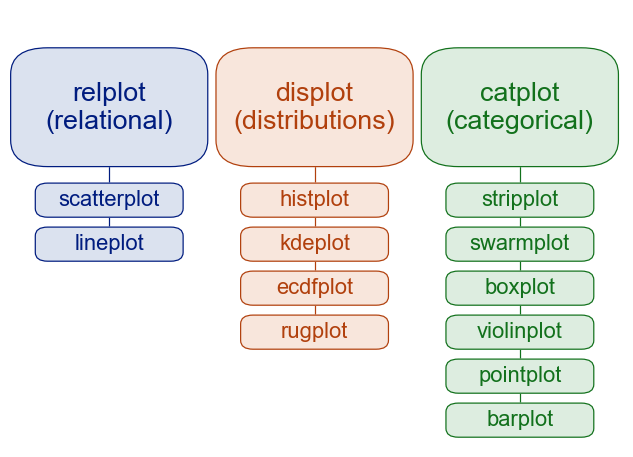

- The general command for this usage is:

`sns.---plot(data=---, x="---", kind="---")`

and you can add appropriate optional elements to it:

`sns.---plot(data=---, x="---", y="---", kind="--", hue="---", multiple="---", col/row="---", style="---", size="---", ...)`

**REMARK: Good to remember the [From Data to Viz website](https://www.data-to-viz.com/) again for explorations to match the type of data with the type of charts by looking at the [examples gallery from seaborn](https://seaborn.pydata.org/examples/index.html)**

In [18]:
# import seaborn
import seaborn as sns

In [76]:
# Starting with data set checking


/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


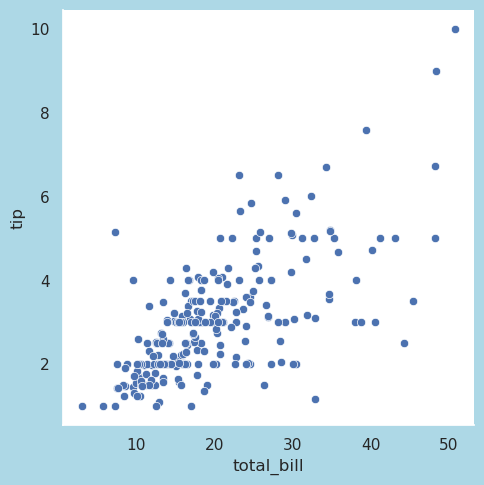

In [91]:
# Starting with simple seaborn explorations
# Create a visualization
sns.relplot(data=tips, # Data sets we are using
    x="total_bill", y="tip", # mapping for x and y-axis
)
plt.show() # Show the plot without any extra label - you may skip it with a small cost

### How to visualize the main steps 

Let us look at the certain components in a visual diagram to see how that works 

![title](Seaborn-visual-steps.png)

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


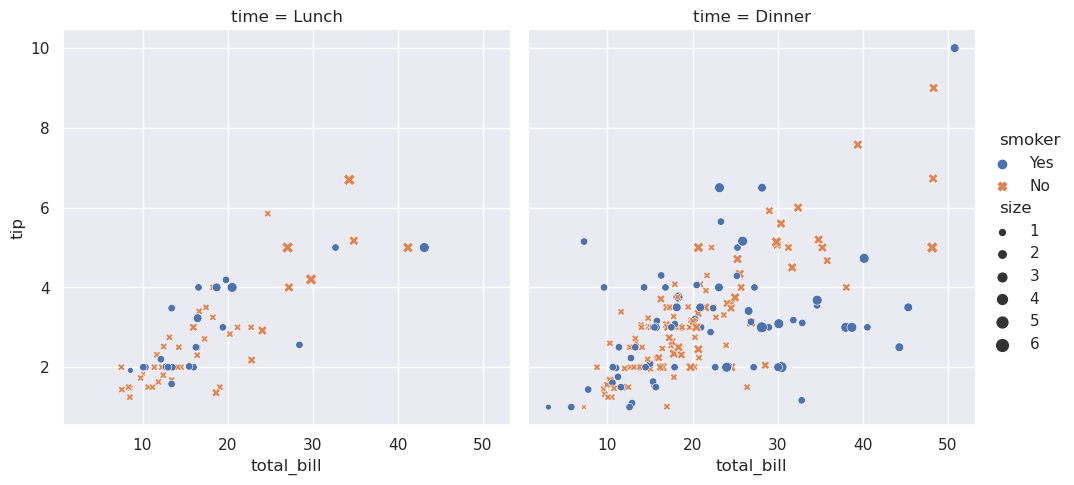

In [57]:
# Create a visualization
sns.relplot(
    data=tips, # Data sets we are using
    x="total_bill", y="tip", # mapping for x and y-axis 
    col="time", hue="smoker", style="smoker", size="size", # other channels that we can use such as 
    # hue parameter in Seaborn's is used to color the data points based a specified categorical column.
)
plt.show()

### displot - Understanding the distributional behaviour of univariate numeric variable

- Let's start with a distributional plot (which shows how values are distributed), for example a histogram
- We usually need to specify the dataset and the variable on X axis (maybe the variable on Y axis too). 
- Then you can set the type of the plot to be `kind="hist"` or `kind="kde"` or other types. 
- You can control the number of distinguished bars in a histogram with `bins=-` and make the histogram more/less smooth.

[Explore the other parameters](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) such as `hue="smoker"`, `multiple="stack"`, `col="sex"` below or adding `kde=True` , `stat = percent`

Text(0.5, 1.0, 'Histogram of total bill')

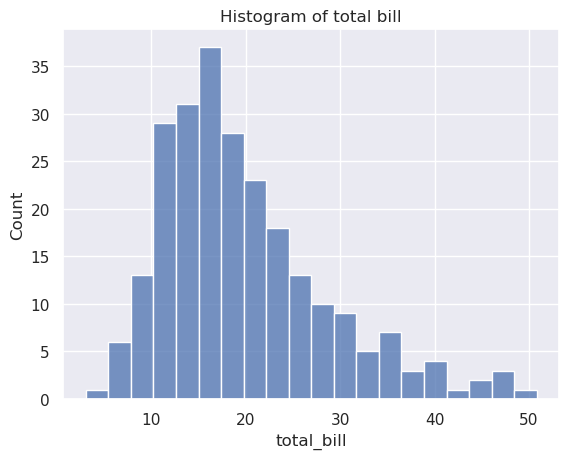

In [58]:
# sns.displot(data=tips, x="total_bill", kind="hist", bins=20)
sns.histplot(data=tips, x="total_bill", bins=20)
# plot's title
plt.title('Histogram of total bill')
# Seaborn is built on top of Matplotlib, so we can use plt.show() to display the plot
# plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


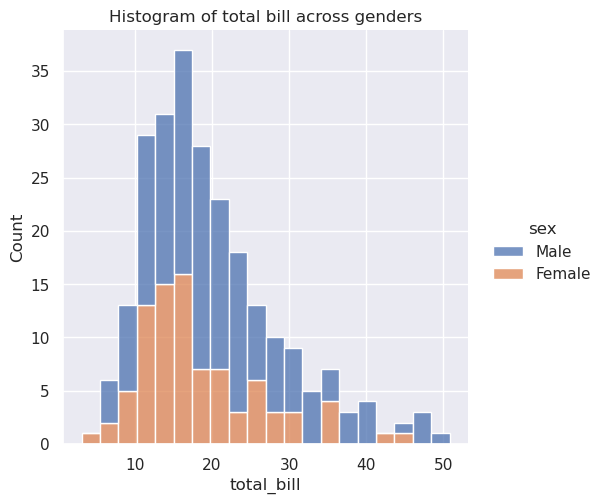

In [55]:
sns.displot(data=tips, x="total_bill", kind="hist", bins=20,
            hue = 'sex', multiple = 'stack')

# plot's title
plt.title('Histogram of total bill across genders')
# To display the plot clearly
plt.show()

---

**Try followings and reflect on**

- what about changing the parameter `bins` instead of 20, try smaller (5) or larger values (50) ?
- what if you changed to `sns.kdeplot` instead of `sns.displot` (Hint: you need to drop `kind="hist"`, `bins=20` from the list of input parameters)
- what about using another categorical variable for `hue` such as day ? or what if you add `col="sex"` as another additional input argument

Ask your further questions through a suitable channel for you, always happy to answer as long as I can do :)

---

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


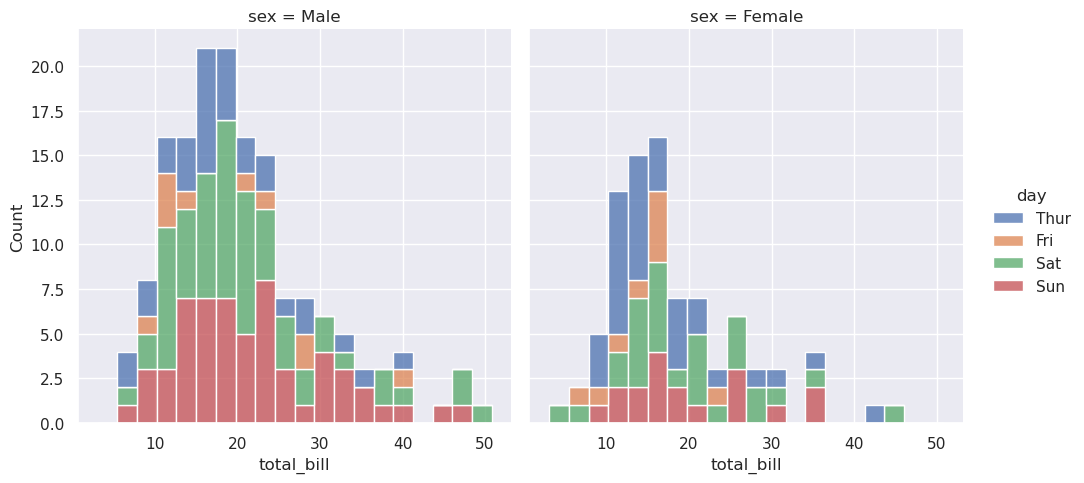

In [59]:
sns.displot(data=tips, x="total_bill", kind="hist", bins=20,
            hue = 'day', col="sex", multiple = 'stack')
# plot's title
# plt.title('Histogram of total bill')
# To display the plot clearly
plt.show()

### Fill in the blank exercise 

Consider the completiong of following to create a modified version of above visualization by changing the role of col and hue arguments. Discuss the difference compared to above representation

In [ ]:
sns.___plot(data=tips, x="total_bill", kind="hist", bins=20,
            hue = ____, col=____, multiple = 'stack')
# plot's title
# plt.title('Histogram of total bill')
# To display the plot clearly
plt.show()

### Scatterplot - Understanding the relationship between two numerical variables

- A scatter plot displays the relationship between two numerical variables. 

- In this example, we'll examine the relationship between the total bill amount and the tip amount.

[Explore the other parameters](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) such as `hue="smoker"`, `size="size"`, `linewidth=0` ...

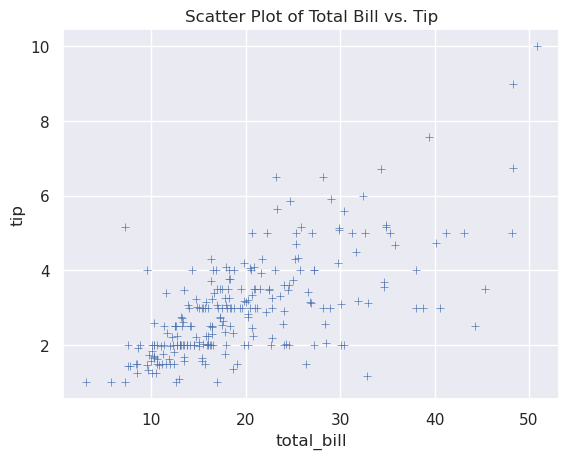

In [60]:
# Create a scatter plot
# sns.relplot(data=tips, x='total_bill', y='tip')
sns.scatterplot(data=tips, x='total_bill', y='tip', marker='+')

# Add a title
plt.title('Scatter Plot of Total Bill vs. Tip')

# To display the plot clearly
plt.show()

In this example, the `marker='+'` argument changes the markers in the scatter plot to diamonds. Seaborn leverages Matplotlib's marker styles, offering a variety of options for customization. Here are some commonly used marker codes:

- '+': Plus
- 'o': Circle
- 's': Square
- '*': Star
- 'x': Cross
- 'v': Triangle Down
- '^': Triangle Up
- '<': Triangle Left
- '>': Triangle Right
- 'p': Pentagon

### Mini exercise to explore 

- how to change the  marker type with different option? Consider adding `hue = ____` with suitable categorical input to see a different breakdown

In [79]:
# Your code is here

---

**Try followings and reflect on**

- what about adding the `style="time"` to your list of inputs ? or adding `col="time"`
- how about assigning `hue` and `style` to different variables at the same time, what do you get ? 
- how to control the specific markers used to map the style variable by passing a Python list or dictionary of marker codes (Hint: consider the use of this definition `markers = {"Lunch": "s", "Dinner": "X"}`)

---

### lineplot - Understanding the trend of a numerical variable over time

- Line plots are useful for visualizing trends over continuous intervals or time periods. 

- Although the tips dataset doesn't contain a time variable, we can create a scenario where we visualize the cumulative sum of total bills over the number of observations.


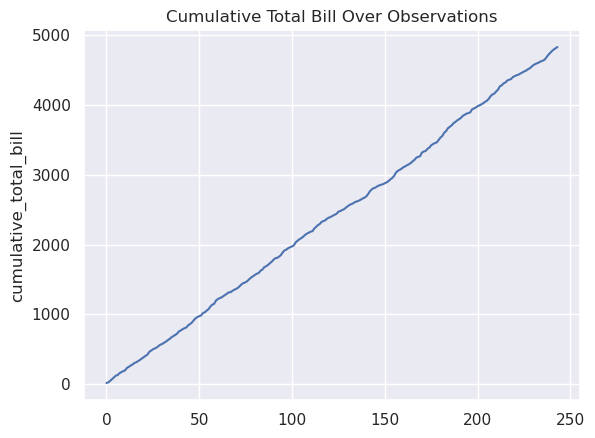

In [61]:
# Calculate the cumulative sum of total bills
tips['cumulative_total_bill'] = tips['total_bill'].cumsum()

# Create a line plot
sns.lineplot(data=tips, x=tips.index, y='cumulative_total_bill')

# Add a title
plt.title('Cumulative Total Bill Over Observations')

# To display the plot clearly
plt.show()

For further trials you can consider another data set that is suitable for time series more such as calling `flights = sns.load_dataset("flights")` instead of using tips

[Explore the other parameters](https://seaborn.pydata.org/generated/seaborn.lineplot.html) such as; 
`errorbar = None`, `hue = "month"`

In [62]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


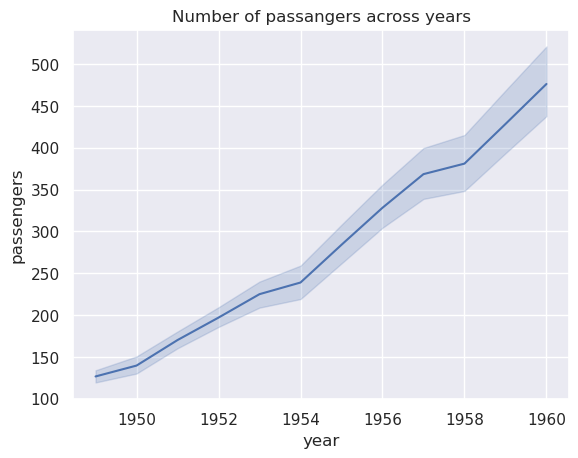

In [63]:
# Create a line plot
sns.lineplot(data=flights, x="year", y="passengers")

# Add a title
plt.title('Number of passangers across years')

# To display the plot clearly
plt.show()

In this example, the `linestyle='--'` argument changes the line style to dashed. Seaborn's lineplot function accepts various linestyle options, including:

- '-' or 'solid': Solid line (default)
- '--' or 'dashed': Dashed line
- '-.' or 'dashdot': Dash-dot line
- ':' or 'dotted': Dotted line

### Mini exercise to explore 

- how to change the `linestyle='___'` type with different option? Consider adding `hue = 'month'` to see differences between months

In [ ]:
# Your code is here

---

**Try followings and reflect on**

- what happens if you use both `hue="month", style="month"` ? Note: Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

- how to change the orientation of x vs y with the help of `orient` argument ? 

- when you added these ` markers=True, dashes=False` how the outcome changes ? 

---

### barplot - Understanding the frequency of a categorical variable

- Bar plots are suitable for visualizing categorical data with corresponding numerical values. 

- Here, we'll compare the average total bill amount for each day of the week.

[Explore the other parameters](https://seaborn.pydata.org/generated/seaborn.barplot.html) such as; `errorbar=None`, `estimator=sum` , `hue = 'sex'`

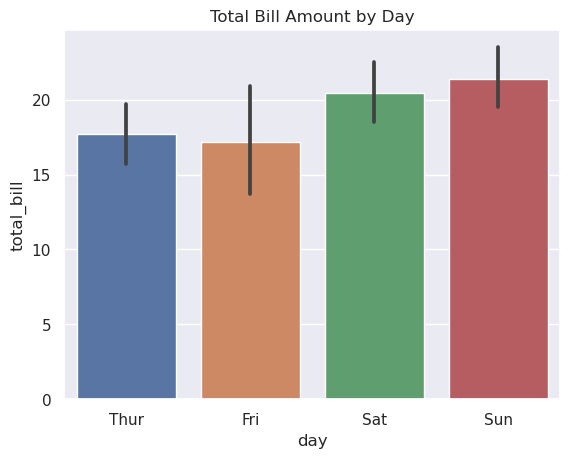

In [64]:
# Create a bar plot
sns.barplot(data=tips, x='day', y='total_bill')

# Add a title
plt.title('Total Bill Amount by Day')

# To display the plot clearly
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


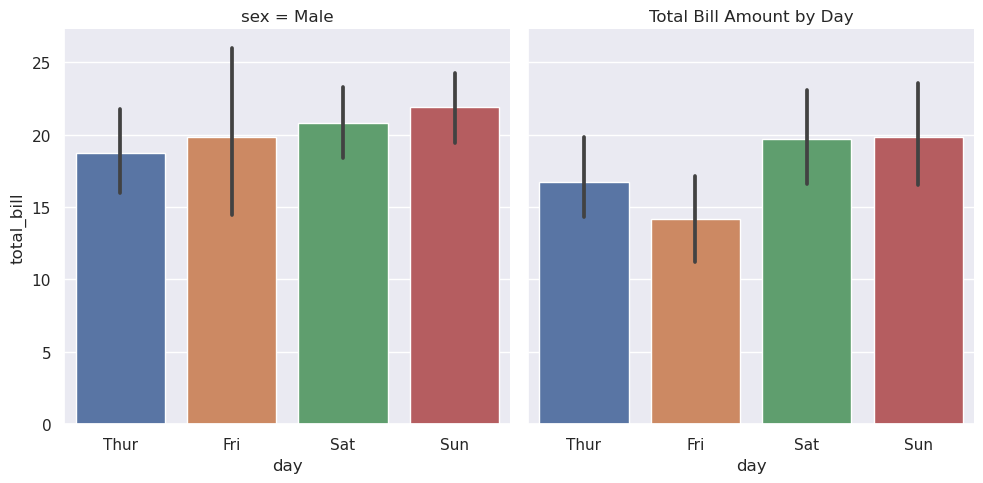

In [65]:
# Create a bar plot in a different syntax but getting roughly the same BUT can be useful for faceted graphs 
sns.catplot(data=tips, x='day', y='total_bill', kind="bar", col="sex")

# Add a title
plt.title('Total Bill Amount by Day')

# Display the plot
plt.show()

### Fill in the blank exercise ____

Consider the completiong of following to create a modified version of above visualization by adding sex as different color with hue argument. Discuss the difference compared to above representation. Note that 

In [ ]:
# Create a bar plot
sns.____plot(data=tips, x='day', y='total_bill', hue = ____)

# Add a title
plt.title('Total Bill Amount by Day')

# To display the plot clearly
plt.____()

---

**Try followings and reflect on**

- How to add text labels with each bar’s value (Hint: see the code example of 

`ax = sns.barplot(flights, x="year", y="passengers", estimator="sum", errorbar=None)`
`ax.bar_label(ax.containers[0], fontsize=10);` to adapt for your case

- What is the impact of the use of `col="sex"` ? 

- Try adding `height=4, aspect=.5` to the both options and see what happens ?

---

### boxplot - Understanding the distributional behavior of numerical variable 

- Box plots are effective for visualizing the distribution of numerical data and identifying potential outliers.

- We'll compare the distribution of total bill amounts across different days.


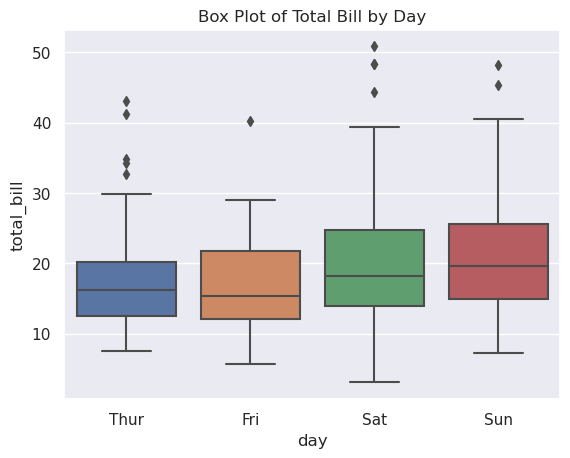

In [68]:
# Create a box plot
sns.boxplot(data=tips, x='day', y='total_bill')

# Add a title
plt.title('Box Plot of Total Bill by Day')

# To display the plot clearly
plt.show()

### Mini exercise to explore 

[Explore the other parameters](https://seaborn.pydata.org/generated/seaborn.boxplot.html) such as; dropping `x='day'`, adding `hue="sex"`, `fill=False`

In [ ]:
# Your code is here

**Try followings and reflect on**

- what happens if you add `whis=(0, 100)`
- What about adding `color=".8"` parameter ? 
- How about the alternatives to boxplot ? Try to get similar visualizations by using the followings; 
    - [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot): A combination of boxplot and kernel density estimation.
    - [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot): A categorical scatterplot where the points do not overlap. Can be used with other plots to show each observation.


**REMARK**

- The `fill` parameter in Seaborn's boxplot function was introduced in version 0.13.0. If you're using an earlier version of Seaborn, the fill parameter won't be recognized, leading to an error. 
- To resolve this issue, you can either update Seaborn to version 0.13.0 or later,

In [30]:
#import seaborn as sns
#print(sns.__version__)

In [31]:
#pip install --upgrade seaborn

In [32]:
#import seaborn as sns
#print(sns.__version__)

## Setting and changing the theme or background 

Customizing the appearance of your Seaborn boxplots can enhance the clarity and aesthetics of your visualizations. Below are examples demonstrating how to set and change the theme or background of a boxplot using the tips dataset.

**1. Setting a Predefined Theme**

Seaborn offers several built-in themes: `'darkgrid', 'whitegrid', 'dark', 'white', and 'ticks'`. You can set a theme using the [`set_style()`](https://seaborn.pydata.org/generated/seaborn.set_style.html) function.

It is also possible to use the function [`set_theme`](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn-set-theme) alternatively to set aspects of the visual theme for all matplotlib and seaborn plots. It is more flexible regarding the available input parameter options. 

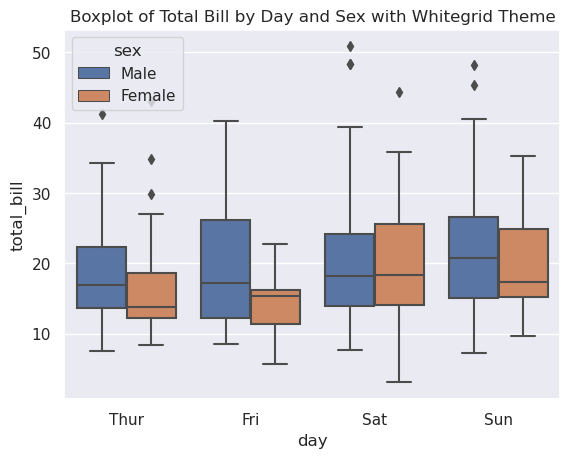

In [70]:
# Apply the default theme
sns.set_theme()

# Create a boxplot
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')

# Add a title
plt.title('Boxplot of Total Bill by Day and Sex with Whitegrid Theme')

# Display the plot
plt.show()

**2. Customizing Background Colors**

For more granular control over the plot's appearance, you can customize the background colors of the axes and the figure using the set() function with the rc parameter.

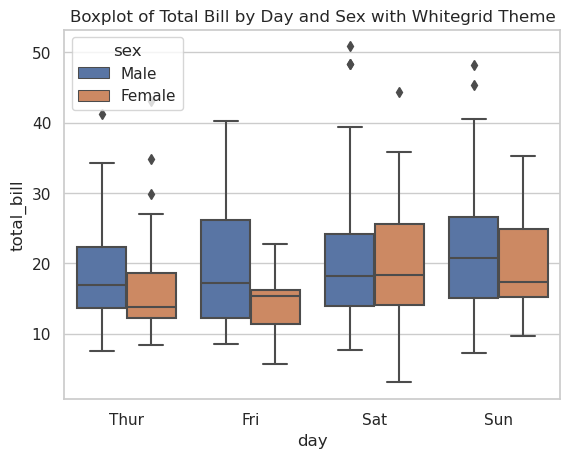

In [71]:
# Set the theme to 'whitegrid'
sns.set_style('whitegrid')

# Create a boxplot
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')

# Add a title
plt.title('Boxplot of Total Bill by Day and Sex with Whitegrid Theme')

# Display the plot
plt.show()

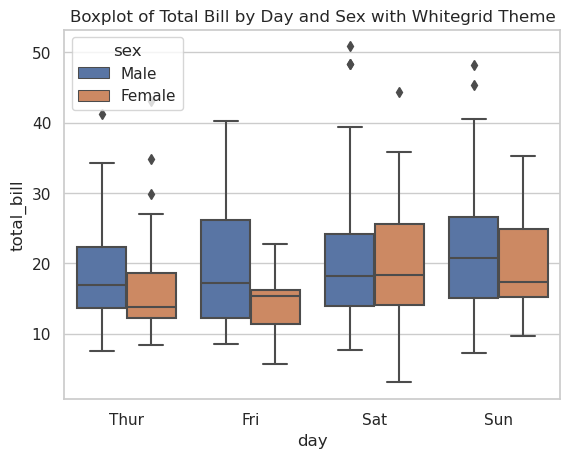

In [72]:
sns.set_theme(context='notebook', style='whitegrid', palette='deep', 
          font='sans-serif', font_scale=1, color_codes=True)

# Create a boxplot
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')

# Add a title
plt.title('Boxplot of Total Bill by Day and Sex with Whitegrid Theme')

# Display the plot
plt.show()

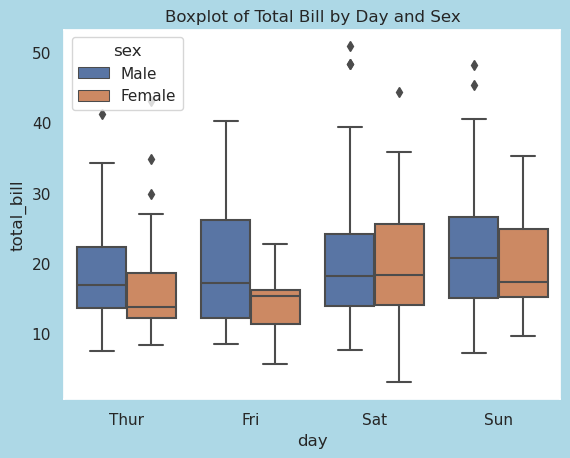

In [73]:
# Set custom background colors
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightblue'})

# Create a boxplot
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', orient = "v")

# Add a title
plt.title('Boxplot of Total Bill by Day and Sex')

# Display the plot
plt.show()

## Saving the images to use for your portfolio or beyond

We have a couple of options; 

**1. Using Matplotlib's `savefig()` Function**

Seaborn is built on top of Matplotlib, so you can use Matplotlib's `savefig()` function to save your plots.

**2. Accessing the Figure Object from Seaborn Plot**

Some Seaborn functions return an Axes object, from which you can retrieve the Figure object and save it.

**3. Saving Plots in Different Formats**

You can save your plots in various formats like PNG, PDF, SVG, or JPEG by specifying the desired file extension in the `savefig()` function.


In [ ]:
# OPTION 1 
# Create a boxplot
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')

# Save the plot as a PNG file
plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
# OPTION 2
# Create a boxplot
ax = sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')

# Retrieve the figure object
fig = ax.get_figure()

# Save the figure
fig.savefig('boxplot_from_ax.png', dpi=300, bbox_inches='tight')

In [ ]:
# Create a boxplot
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')

# Save the plot as a PDF file
plt.savefig('boxplot.pdf', dpi=300, bbox_inches='tight')

# Save the plot as an SVG file
plt.savefig('boxplot.svg', dpi=300, bbox_inches='tight')

# Display the plot
#plt.show()

## Some specific examples with seaborn

### heatmap - overall relationship between numerical variables over correlation

- Plot rectangular data as a color-encoded matrix using the correlation information between numerical variables

- This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. 

[Explore the other parameters](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap) such as; `annot`, `cbar` or  `cmap='coolwarm'`

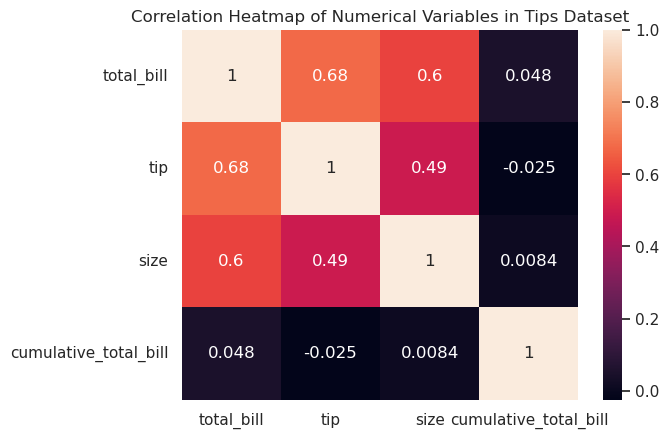

In [69]:
# Select only numerical columns
numerical_tips = tips.select_dtypes(include='number')

# Create a heatmap of the numerical variables based on their correlation
sns.heatmap(numerical_tips.corr(), annot=True)

# Add a title
plt.title('Correlation Heatmap of Numerical Variables in Tips Dataset')

# Display the plot
plt.show()

### Other plots to explore with seaborn


- [Multivariate views on complex datasets](https://seaborn.pydata.org/tutorial/introduction.html#multivariate-views-on-complex-datasets)

- use of pairplot for the first insight is good to have, [pairplot(), takes a broader view](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

- [Further control on figure asthetics](https://seaborn.pydata.org/tutorial/aesthetics.html#controlling-figure-aesthetics)

- If you need, certain transformations on the data before plotting with seaborn syntax as well, via [Transforming data before plotting](https://seaborn.pydata.org/tutorial/objects_interface.html#transforming-data-before-plotting)

- It is possible to create a [structured multi plot grids](https://seaborn.pydata.org/tutorial/axis_grids.html#building-structured-multi-plot-grids)

In [ ]:
# Apply the default theme
sns.set_theme()

# Create a pair plot
sns.pairplot(tips[['total_bill', 'tip', 'size', 'time']], hue='time')
# Add a title
plt.suptitle('Pair Plot of Total Bill, Tip, and Size Colored by Time', y=1.02)
# Display the plot
plt.show()

### Open Ended questions 

Use the attached data sets for this week `fishimportdata.xlsx`, `UK_wood_imports.xlsx` or `oil_reserve_data.csv` consider similar data visualizations as above with new data attributes (variables)

Make sure that the selected attributes is suitable for the type of data visualization. 

Play around sns functionalities we explored like `sns.pairplot()` or others to get your new visualizations over different data sets rather than the tips data we explored. 

### Overall Comparison of three main modules 

All below modules are integrated into Pandas module in general but they differ on certain elements;

| Aspect                | Matplotlib                                                                 | Seaborn                                                                 | Altair                                                                 |
|-----------------------|----------------------------------------------------------------------------|-------------------------------------------------------------------------|------------------------------------------------------------------------|
| **Ease of Use**       | Matplotlib has a steeper learning curve due to its detailed and low-level API, but it offers great flexibility once mastered. | Seaborn simplifies plot creation with high-level functions and sensible defaults, making it easier for beginners. | Altair's declarative syntax is intuitive and easy to learn, especially for users familiar with JSON-like structures. |
| **Customization**     | Matplotlib offers extensive customization options, allowing fine-grained control over every aspect of the plot. | Seaborn builds on Matplotlib, providing some customization but less control over individual plot elements. | Altair allows customization through its concise grammar, but it may be less flexible for highly specific customizations. |
| **Interactivity**     | Matplotlib supports basic interactivity through additional libraries like mpld3 or interactive backends. | Seaborn is not inherently designed for interactivity, focusing more on static plots. | Altair excels in interactivity, allowing users to create interactive visualizations with minimal effort. |
| **Performance**       | Matplotlib is efficient for static plots but can be slower for large datasets or complex plots. | Seaborn's performance is similar to Matplotlib, as it is built on top of it, but it may be slower due to additional abstraction. | Altair is optimized for interactive plots, but performance can be limited by the size of the data due to its reliance on Vega-Lite. |
| **Community and Documentation** | Matplotlib has a large, active community with extensive documentation and numerous tutorials available. | Seaborn benefits from a supportive community and comprehensive documentation, though smaller than Matplotlib's. | Altair's community is growing, with good documentation and examples, but it is smaller compared to Matplotlib and Seaborn. |
| **Aesthetic Appeal**  | Matplotlib's default aesthetics are basic, but it offers themes and styles for improved visuals. | Seaborn provides aesthetically pleasing default styles and color palettes, enhancing the visual appeal of plots. | Altair offers modern and clean aesthetics by default, with a focus on clarity and simplicity. |


### General Tips and Suggestions

- If you're unsure about a specific function or parameter, check the related documentations for detailed explanations and examples.
- Experiment with different plot types and customizations to see how they affect the output.
- Try plotting different datasets (that we shared) to get comfortable with the library.
- Explore additional features like subplots, legends, and annotations to enhance your visualizations.

**Note: This is an iterative process so while working on different trials, try to reflect on your experiences and let us know**

## Coming Soon: Plotnine and Altair (Vega-Altair) Module

Next time, we will be looking at data visualization from a a different perspective via 

- [Plotnine](https://plotnine.org/) which is the data visualization package for Python based on the grammar of graphics, a coherent system for describing and building graphs, similar to ggplot2, a widely successful R package.
- [Altair](https://altair-viz.github.io/index.html) which provides various functions to perform plots. 


- There is lots of information on Plotnine and Altair on the web pages describing their functionalities and example galleries. 
- The 'getting started' pages are a good quick read to get a sense of how data visualisations are expressed in Plotnine https://plotnine.org/guide/introduction.html and Altair https://altair-viz.github.io/getting_started/starting.html.
- These are a great source of reference and something we will come back to throughout discussing python data visualisations in the course. 

**Strategy to start with:** A very basic way to get started with producing a new visualisation is to find the closest gallery example to the thing you wish to produce and then cut and paste the example code used to make it as a starting point.

## 1. Plotnine initial exploration

Plotnine is a Python package for data visualization, based on the grammar of graphics. It implements a wide range of plots—including barcharts, linegraphs, scatterplots, maps, and much more.

### Main Components of Plotnine

**Import Libraries**: Import necessary libraries such as Altair and Pandas to handle data and create visualizations.

**Prepare Your Data**: Load and prepare your data using Pandas, ensuring it's in a suitable format for visualization.

**Initiate your Chart**: Use [`ggplot()`](https://plotnine.org/reference/ggplot.html) to create a new ggplot object to cover two main layers including your data set with suitable mapping via [`aes()`](https://plotnine.org/reference/aes.html)

**Choose a mark type**: Select the type of visualization (e.g., bar, line, scatter) using the correct type of the [`geom_xxx()`](https://plotnine.org/reference/geom.html) layer, such as `geom_point(), geom_line()`

**Add other layers**: Map data fields to visual properties like axes, colors, and sizes or include further customization with the specific new layers step by step

## 2. Altair your data : )

Altair library is a declarative statistical visualization library for Python. It allows you to create interactive and informative visualizations with minimal code. For the main steps that we need to remember, we can follow the below step-by-step guidance all the time;

### Main Components of 

**Import Libraries**: Import necessary libraries such as Altair and Pandas to handle data and create visualizations.

**Prepare Your Data**: Load and prepare your data using Pandas, ensuring it's in a suitable format for visualization.

**Create a Base Chart**: Use [`alt.Chart()`](https://altair-viz.github.io/user_guide/generated/toplevel/altair.Chart.html) to define a base chart with your DataFrame as the starting point.

**Choose a Mark Type**: Select the type of visualization (e.g., bar, line, scatter) using the appropriate [`mark_*`](https://altair-viz.github.io/user_guide/marks/index.html) method. Such as; `mark_line()`, `mark_point()`, etc.

**Encode Data**: Map data fields to visual properties like axes, colors, and sizes using the [`encode()`](https://altair-viz.github.io/user_guide/encodings/index.html#encoding-data-types) method.
